In [18]:
#installing
!pip install google_trans_new
!pip install pyLDAvis
!pip install pywaffle

#importing important modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Primary data* is available at https://www.kaggle.com/abhisheksjmr/speeches-modi

(* here primary data means the data which we will work on mostly)

In [19]:
# obtaining data stored on github using url
data=pd.read_csv('https://raw.githubusercontent.com/tpavankalyan/ds203/master/PM_Modi_speeches.csv',sep=",")
image=pd.read_excel('https://github.com/tpavankalyan/ds203/blob/master/modi-copy.xlsx?raw=true')
data['image']=image['IMG-src']

#looking at the data
display(data)

,date,title,url,lang,words,text,image
0,"Aug 30, 2020",PM’s address in the 15th Episode of ‘Mann Ki B...,https://www.pmindia.gov.in/en/news_updates/pms...,en,21619,"My dear countrymen, Namaskar.\nGenerally, this...",https://www.pmindia.gov.in/wp-content/uploads/...
1,"Aug 29, 2020",PM’s address at inauguration of the College an...,https://www.pmindia.gov.in/en/news_updates/pms...,en,10128,Our country’s Agriculture Minister Shri Narend...,https://www.pmindia.gov.in/wp-content/uploads/...
2,"Aug 27, 2020",PM’s address at seminar on Atmanirbhar Bharat ...,https://www.pmindia.gov.in/en/news_updates/pms...,en,8497,"My cabinet colleague, Shri Rajnath ji, Chief o...",https://www.pmindia.gov.in/wp-content/uploads/...
3,"Aug 15, 2020",PM’s address to the Nation from the ramparts o...,https://www.pmindia.gov.in/en/news_updates/pms...,en,50260,"My dear countrymen,\nCongratulations and many ...",https://www.pmindia.gov.in/wp-content/uploads/...
4,"Aug 13, 2020",PM’s address at the Launch of ‘Transparent Tax...,https://www.pmindia.gov.in/en/news_updates/pms...,en,11908,The process of Structural Reforms going on in ...,https://www.pmindia.gov.in/wp-content/uploads/...
...,...,...,...,...,...,...,...
917,"Oct 09, 2014",Text of the PM’s keynote address at the “Inves...,https://www.pmindia.gov.in/en/news_updates/tex...,hi,21430,"भाइयों और बहनों,\nये ऐसा कार्यक्रम है, जिसमें ...",https://www.pmindia.gov.in/wp-content/uploads/...
918,"Oct 03, 2014",English rendering of text of PM’s first Mann K...,https://www.pmindia.gov.in/en/news_updates/eng...,en,11169,"My Dear Countrymen,\nToday is the holy festiva...",https://www.pmindia.gov.in/wp-content/uploads/...
919,"Oct 03, 2014",Text of PM’s first Mann ki Baat to the Nation ...,https://www.pmindia.gov.in/en/news_updates/tex...,hi,10312,"मेरे प्यारे देशवासियो,\nआज विजयदशमी का पावन पर...",https://www.pmindia.gov.in/wp-content/uploads/...
920,"Oct 02, 2014",Text of PM’s address during launch of ‘Swachh ...,https://www.pmindia.gov.in/en/news_updates/tex...,hi,15605,भारत माता की जय!\nमहात्मा गांधी अमर रहे! महात्...,https://www.pmindia.gov.in/wp-content/uploads/...


OBSERVATIONS:
1. column named "url" is not useful for analysing the data as it is a metadata component.
2. Date is in the word format. Seperating the year and the month into new columns is very useful for Exploratory data analysis.
3. The text column contains text in two languages: English and Hindi
4. The data in the last column was scrapped from the original website of the speeches and hence a dataset was created out of it.

In [20]:
#removing column url
data.drop('url',axis=1,inplace=True)

#changing the format of the date-creating new columns
data['date'] = pd.to_datetime(data['date'], errors='ignore')
data['year'] = pd.DatetimeIndex(data['date']).year
data['month'] = pd.DatetimeIndex(data['date']).month

#grouping data according to year and month
group_months=data.groupby([data['year'],data['month']])
group_months=group_months['month'].count().to_frame(name='num_speeches').reset_index()

Here in this table 'group_months' the column 'num_speeches' denotes the number of speeches given by Mr. Primeminister in each month.

In [21]:
#adding some missing months in which Mr. Modi did not give a speech
group_months['month_year']=group_months['year'].astype(str)+"-"+group_months['month'].astype(str)
num_speech=list(group_months['num_speeches'])
num_speech.insert(1,0)
num_speech.insert(49,0)
num_speech.insert(52,0)
num_speech.insert(56,0)
num_speech.insert(59,0)

In [22]:
# importing dataset of google search trends of the word 'MODI'
google_searches=pd.read_csv('https://raw.githubusercontent.com/tpavankalyan/ds203/master/multiTimeline%20(2).csv')
google_searches=google_searches.reset_index().drop(0).reset_index()
google_searches['num_speeches']=num_speech
c=google_searches['Category: All categories'].astype(int).sum()
d=google_searches['num_speeches'].astype(int).sum()

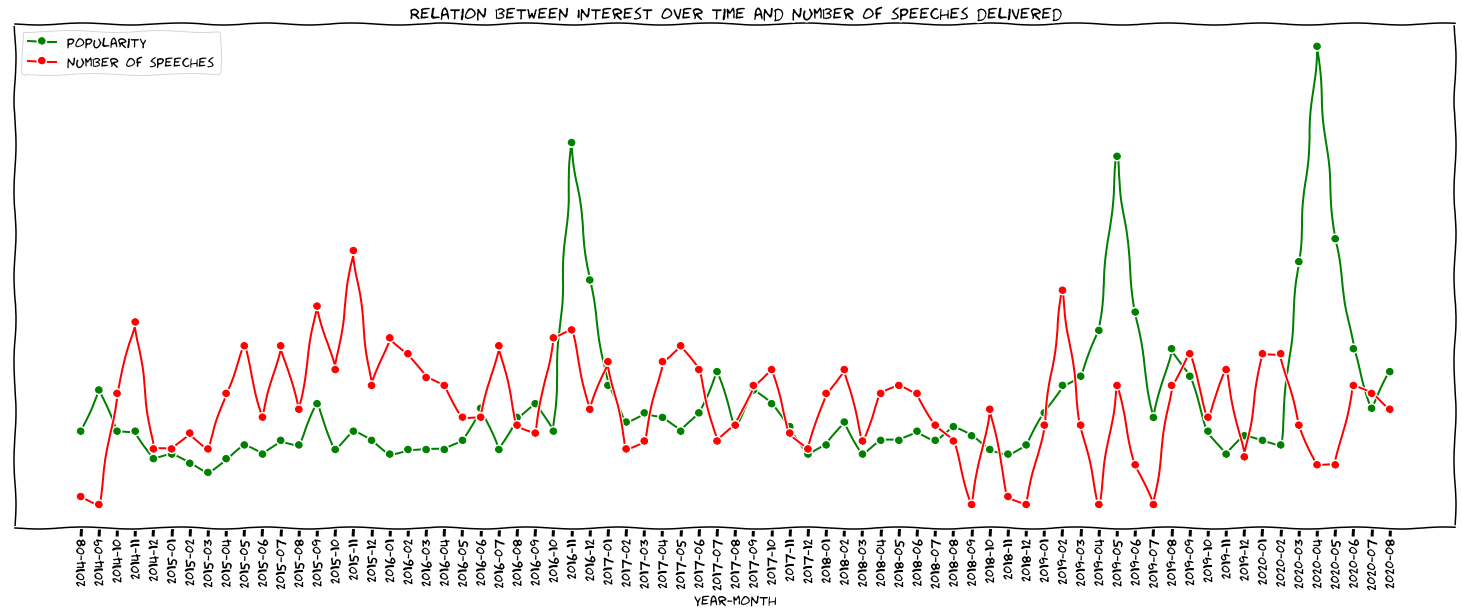

In [23]:
#plotting the popularity of 'MODI' and number of speeches given by Mr. Primeminister
with plt.xkcd():
  fig = plt.figure(figsize=(25,10))
  ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
  ax.plot(google_searches['index'],google_searches['Category: All categories'].astype(int)/c,lw=2,marker='o',c='green',label='popularity')
  ax.plot(google_searches['index'],google_searches['num_speeches'].astype(int)/d,lw=2,marker='o',c='red',label='number of speeches')
  ax.set_xlabel('year-month')
  ax.set_xticklabels(google_searches['index'],rotation='vertical')
  ax.set_yticks([])
  ax.set_title('Relation between Interest over time and number of speeches delivered')
  ax.legend()

Description of the chart:
1. The above line chart shows 'popularity' of the term 'MODI' and the number of speeches given by Mr. Modi vs each month of the year between august 2014 and august 2020.
2. The red line denotes the number of speeches given by Mr. Modi. It is plotted using the grouped table i.e. 'group_months'.
3. The green line represent search interest relative to the highest point on the chart for the given time. A value of 100 denotes the peak popularity for the term 'MODI'. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.
4. The data for green line on this chart is taken from google trends.(https://trends.google.com/trends/explore?q=MODI&geo=US)

Observations:
The three peeks of popularity are in the months when the number of speeches given are relatively low, so it looks like Mr. Modi's silence makes him more popular as compared to his speeches.

LET US LOOK AT THE SUMMARY OF NUMERICAL COLUMNS IN THE DATASET

In [24]:
data.describe()

,words,year,month
count,922.000000,922.000000,922.000000
mean,12374.189805,2016.978308,6.401302
std,8891.662434,1.771890,3.492744
min,753.000000,2014.000000,1.000000
25%,5560.000000,2015.000000,3.000000
50%,10660.500000,2017.000000,6.000000
75%,16476.500000,2019.000000,10.000000
max,74199.000000,2020.000000,12.000000


Here the columns "year", "month" are not very useful in the summary table. But the column "words" has a mean of 12374 words approximately. and the shortest speech had just 753 words with the longest speech having 74199 words

In [25]:
# finding the types of variables and the number of unique values
dtype=pd.DataFrame(data.dtypes)
dtype["num_of_unique_val"]=pd.DataFrame(data.nunique(dropna=True))
dtype["num_of_null_val"]=pd.DataFrame(data.isnull().sum())
display(dtype)

,0,num_of_unique_val,num_of_null_val
date,datetime64[ns],679,0
title,object,900,0
lang,object,2,0
words,int64,908,0
text,object,922,0
image,object,901,0
year,int64,7,0
month,int64,12,0


The table above shows the variable type and number of unique values it holds. The column "lang" denotes the language in whcih the speech was given. Let us look at the share of hindi speeches in the dataset

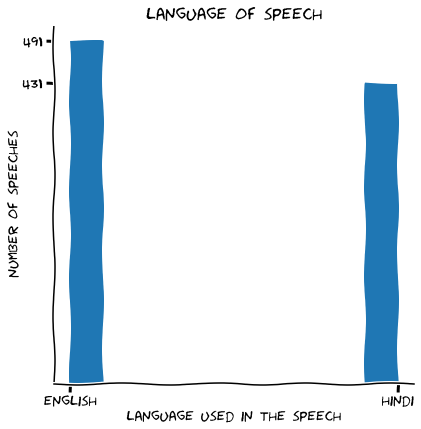

In [26]:
#plotting histogram for lang
with plt.xkcd():
  fig= plt.figure(figsize=(5,5))
  ax = fig.add_axes((0.1,0.2,1,1))
  ax.hist(data.lang)
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')
  ax.xaxis.set_ticks_position('bottom')
  ax.set_xlabel('language used in the speech')
  ax.set_ylabel('number of speeches')
  ax.set_xticks([0,1])
  ax.set_xticklabels(['english', 'hindi'])
  plt.yticks([np.sum(data['lang']=='hi'),np.sum(data['lang']=='en')])
  plt.title("language of speech")
  plt.show()

OBSERVATION: The number of speeches in both english and hindi are comparable. So, for analysing the dataset the hindi speeches can not be eliminated. Instead they need to be translated first into english for anlaysis

In [28]:
#translation
from google_trans_new import google_translator
translator=google_translator()
for i in data[data['lang']=='hi'].index:
  j=0
  tex=""
  while j<data.words[i]:
    k=j+4500
    if k>data.words[i]:
      k=data.words[i]
    tex=tex+translator.translate(data.text[i][j:k],lang_tgt='en');
    j=k
  data.text[i]=tex
data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,date,title,lang,words,text,image,year,month
0,2020-08-30,PM’s address in the 15th Episode of ‘Mann Ki B...,en,21619,"My dear countrymen, Namaskar.\nGenerally, this...",https://www.pmindia.gov.in/wp-content/uploads/...,2020,8
1,2020-08-29,PM’s address at inauguration of the College an...,en,10128,Our country’s Agriculture Minister Shri Narend...,https://www.pmindia.gov.in/wp-content/uploads/...,2020,8
2,2020-08-27,PM’s address at seminar on Atmanirbhar Bharat ...,en,8497,"My cabinet colleague, Shri Rajnath ji, Chief o...",https://www.pmindia.gov.in/wp-content/uploads/...,2020,8
3,2020-08-15,PM’s address to the Nation from the ramparts o...,en,50260,"My dear countrymen,\nCongratulations and many ...",https://www.pmindia.gov.in/wp-content/uploads/...,2020,8
4,2020-08-13,PM’s address at the Launch of ‘Transparent Tax...,en,11908,The process of Structural Reforms going on in ...,https://www.pmindia.gov.in/wp-content/uploads/...,2020,8
...,...,...,...,...,...,...,...,...
917,2014-10-09,Text of the PM’s keynote address at the “Inves...,hi,21430,"brothers and sisters,\nThis is a program in wh...",https://www.pmindia.gov.in/wp-content/uploads/...,2014,10
918,2014-10-03,English rendering of text of PM’s first Mann K...,en,11169,"My Dear Countrymen,\nToday is the holy festiva...",https://www.pmindia.gov.in/wp-content/uploads/...,2014,10
919,2014-10-03,Text of PM’s first Mann ki Baat to the Nation ...,hi,10312,"My dear countrymen,\nToday is the holy festiva...",https://www.pmindia.gov.in/wp-content/uploads/...,2014,10
920,2014-10-02,Text of PM’s address during launch of ‘Swachh ...,hi,15605,Long live Mother India!\nMay Mahatma Gandhi be...,https://www.pmindia.gov.in/wp-content/uploads/...,2014,10


Here the hindi speeches are translated into English using googletrans that implemented Google Translate API. It is used to detect the language and translate into a target language.

Hence now all the data is converted into one language i.e. English. Now let us clean the text and do topic modelling

# Topic Modelling

Topic modelling is an unsupervised machine learning technique where the most important topics from the text are identified based on parameters like word frequency, distance between words. Here Topic modelling is implemented using two different algorithms :

1) LSA: Latent semantic analysis

2) LDA: Latent dirichlet allocation

##Latent Semantic Analysis
This method is primarily based on Distributional hypothesis which is in simple words "linguistic items with similar distribution have similar meanings".
Hence we compute how frequently the words occur in the text. assuming the entitre text just to be a bag of words without any syntatic and semantic information. We basically divide the corpus into two :

1. a list of topics covered by documents in corpus
2. set of documents grouped by the topic they cover

First step is to clean the data i.e. removing all characters except alphabets. removing short words like conjunctions and finally converting entire text into lowercase to nullify case sensitivity.

In [29]:
LSA_data = data
# removing everything except alphabets`
LSA_data['text'] = LSA_data['text'].str.replace("[^a-zA-Z#]", " ")
# removing short words
LSA_data['text'] = LSA_data['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# make all text lowercase
LSA_data['text'] = LSA_data['text'].apply(lambda x: x.lower())

In this step we will 

1. tokenize the text, i.e. split the text into individual words 
2. remove the words like 'it', 'when', 'while', 'about', 'because' etc. These words are called stopwords.
3. Once the stop words are removed the tokens are stitched back.

In [30]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# tokenization
tokenized_doc = LSA_data['text'].apply(lambda x: x.split())
# remove stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
# de-tokenization
detokenized_doc = []
for i in range(len(LSA_data)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)
LSA_data['text'] = detokenized_doc
LSA_data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,date,title,lang,words,text,image,year,month
0,2020-08-30,PM’s address in the 15th Episode of ‘Mann Ki B...,en,21619,dear countrymen namaskar generally period full...,https://www.pmindia.gov.in/wp-content/uploads/...,2020,8
1,2020-08-29,PM’s address at inauguration of the College an...,en,10128,country agriculture minister shri narendra sig...,https://www.pmindia.gov.in/wp-content/uploads/...,2020,8
2,2020-08-27,PM’s address at seminar on Atmanirbhar Bharat ...,en,8497,cabinet colleague shri rajnath chief defence s...,https://www.pmindia.gov.in/wp-content/uploads/...,2020,8
3,2020-08-15,PM’s address to the Nation from the ramparts o...,en,50260,dear countrymen congratulations many best wish...,https://www.pmindia.gov.in/wp-content/uploads/...,2020,8
4,2020-08-13,PM’s address at the Launch of ‘Transparent Tax...,en,11908,process structural reforms going country touch...,https://www.pmindia.gov.in/wp-content/uploads/...,2020,8
...,...,...,...,...,...,...,...,...
917,2014-10-09,Text of the PM’s keynote address at the “Inves...,hi,21430,brothers sisters program must stay full time d...,https://www.pmindia.gov.in/wp-content/uploads/...,2014,10
918,2014-10-03,English rendering of text of PM’s first Mann K...,en,11169,dear countrymen today holy festival vijay dash...,https://www.pmindia.gov.in/wp-content/uploads/...,2014,10
919,2014-10-03,Text of PM’s first Mann ki Baat to the Nation ...,hi,10312,dear countrymen today holy festival vijayadash...,https://www.pmindia.gov.in/wp-content/uploads/...,2014,10
920,2014-10-02,Text of PM’s address during launch of ‘Swachh ...,hi,15605,long live mother india mahatma gandhi immortal...,https://www.pmindia.gov.in/wp-content/uploads/...,2014,10


Here we will create a document term matrix A. Given m texts and n unique words in our vocabulary, we can construct a mxn matrix A in which each row represents a document and each column represents a word. This matrix is filled by tf-idf scores(term frequency-inverse document frequency).
This assigns a weight for term j in the document i as follows:      

$ w_{i,j} = tf_{i,j} * log(\frac{N}{df_i})$

Hence we use TfidfVectorizer to create a document term matrix.

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english',  
smooth_idf=True)
X = vectorizer.fit_transform(LSA_data['text'])
X.shape # check shape of the document-term matrix

(922, 27056)

This step focuses on Matrix decomposition and dimensionality reduction.

1. we will use TruncatedSVD to decompose A into multiple matrices and also to reduce the number of topics to 20. This is a hyperparameter and can be finetuned to get the best results possible.
2. TruncatedSVD or singular value decomposition factorizes A into 3 seperate matrices where dimensionality is reduced by keeping 20 most significant topics. 
 
 the matrix is decomposed as $A=USV^T$

 where U is the document term matrix and V is the term topic matrix

In [32]:
from sklearn.decomposition import TruncatedSVD
# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(X)
len(svd_model.components_)

20

Now let's print the 20 most important topics from our model

In [33]:
terms = vectorizer.get_feature_names()
for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])

Topic 0: 
india
country
people
world
government
today
work
Topic 1: 
india
cooperation
partnership
president
countries
asean
excellency
Topic 2: 
farmers
farmer
government
sisters
brothers
crore
scheme
Topic 3: 
yoga
friends
farmers
world
health
corona
india
Topic 4: 
yoga
farmers
farmer
cooperation
sisters
president
village
Topic 5: 
india
sardar
friends
country
unity
saheb
sisters
Topic 6: 
brics
sardar
friends
farmers
corona
baat
mann
Topic 7: 
brics
yoga
poor
bank
president
crore
business
Topic 8: 
africa
brics
world
india
sardar
farmer
farmers
Topic 9: 
asean
east
region
excellencies
north
asia
summit
Topic 10: 
saheb
sardar
baba
constitution
asean
yoga
ambedkar
Topic 11: 
bangladesh
brics
north
east
nepal
development
world
Topic 12: 
africa
buddha
poor
house
sustainable
energy
african
Topic 13: 
africa
bangladesh
north
african
sardar
east
kashmir
Topic 14: 
bangladesh
nepal
buddha
brics
japan
constitution
prime
Topic 15: 
corona
africa
pandemic
lockdown
asean
friends
coronavirus


###visualization of LSA
Visulaization of LSA is models is quite difficult. We reduce the dimensionality here and visualization is done using UMAP(Uniform manifold approximation and projection) which is a scalable and efficient dimension reduction algorithm.

Here we have used the following parameters:
1. n_neighbors: which controls local versus global structure in the data
2. min_dist: controls how tightly UMAP is allowed to pack the points together

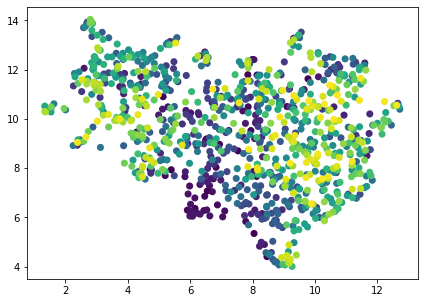

In [34]:
import umap

X_topics = svd_model.fit_transform(X)
embedding = umap.UMAP(n_neighbors=50, min_dist=0.5, random_state=12).fit_transform(X_topics)

plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], 
c =LSA_data.index,
s = 50, # size
edgecolor='none'
)
plt.show()

Here in this plot, each blue dot represents a text and the colors represent the most  significant 20 topics. As it can be seen that the topics have covered all the texts properly, it shows that our model performed well.

##Latent Dirichlet Allocation
The purpose of both the algorithms are same but the main difference between LDA and LSA is that LDA assumes that the distribution of topics in a documnent and words in a topic are dirichlet distributions unlike LSA where it does not assume any predefined distributions. More about the algorithm can be found out from https://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf which is the original paper.

The first step here is the same as LSA. we will also normalize the corpus here using WordNetLemmatizer

In [35]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import nltk
nltk.download('wordnet')
LDA_data=LSA_data
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in LDA_data.text]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [37]:
# Importing Gensim
import gensim
from gensim import corpora
# Creating the term dictionary of our courpus, where every unique term is assigned an index.
dictionary = corpora.Dictionary(doc_clean)
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel
# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=10, id2word = dictionary, passes=50)
print(ldamodel.print_topics(num_topics=10, num_words=5))

[(0, '0.019*"world" + 0.013*"india" + 0.011*"yoga" + 0.011*"people" + 0.010*"country"'), (1, '0.029*"farmer" + 0.016*"also" + 0.012*"country" + 0.008*"government" + 0.007*"market"'), (2, '0.016*"people" + 0.014*"village" + 0.009*"government" + 0.007*"india" + 0.006*"also"'), (3, '0.012*"friend" + 0.012*"yoga" + 0.010*"country" + 0.010*"also" + 0.010*"people"'), (4, '0.022*"government" + 0.017*"country" + 0.013*"year" + 0.012*"also" + 0.010*"crore"'), (5, '0.009*"india" + 0.008*"countryman" + 0.008*"also" + 0.007*"sport" + 0.007*"life"'), (6, '0.036*"india" + 0.013*"also" + 0.010*"world" + 0.008*"indian" + 0.007*"country"'), (7, '0.018*"country" + 0.016*"government" + 0.016*"also" + 0.014*"sister" + 0.013*"brother"'), (8, '0.018*"country" + 0.013*"india" + 0.012*"also" + 0.011*"people" + 0.010*"today"'), (9, '0.015*"country" + 0.014*"people" + 0.012*"also" + 0.012*"today" + 0.011*"india"')]


Here we see all the significant words present in each of the topics along with their weights. Let us arrange them a bit beautifully and try to find some inferences from the wordcloud

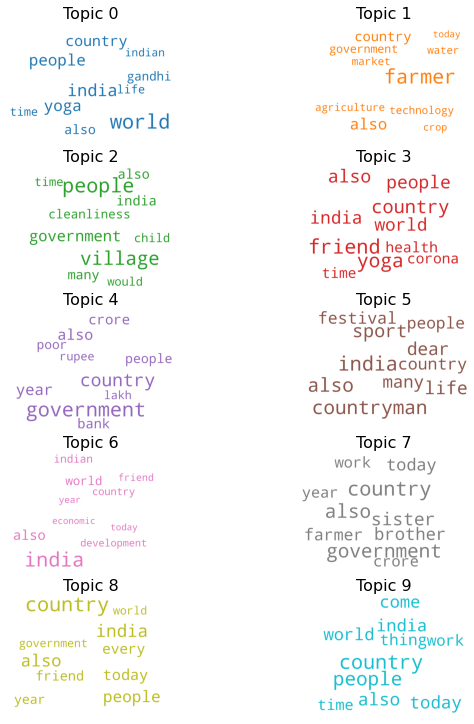

In [38]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(5, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout(pad=0.5)
plt.show()

Observations:

Topic 9:=> this has words like lord,ayurveda, buddha, compassion which points mainly at the "cultural heritage of India"

Topic 8:=> Words like society, life, time and people draws attention at the discussion of "general life of people in india"

Topic 7:=> it talks about country and the government in general.

Topic 6:=> it talks about india and the world in general.

Topic 5:=> it talks about country and the government in general.

Topic 4:=> This topic points at festive mood and unity

Topic 3:=> deals with the international affairs

Topic 2:=> points at economy of the country.

Topic 1:=> it talks about country and the government in general.

Topic 0:=> it talks about country and the government in general.

In [39]:
!pip install pyLDAvis
import pyLDAvis.gensim 
import pyLDAvis.sklearn
#Gensim Library for Text Processing
import gensim.parsing.preprocessing as gsp
from gensim import utils, corpora, models
# SK Learn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA


###visualization of LSA
Let us now visualize the produced topics and the associated keywords

In [40]:
lda_display = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

Observations:
1. Each bubble here shows a topic. The larger the bubble, the most prevalent is that topic.hence according to our model it is topic 6.
2. Alright, if you move the cursor over one of the bubbles, the words and bars on the right-hand side will update. These words are the salient keywords that form the selected topic.
3. Since most of the bubbles are clustered in the 1st and 4th quadrant, it is not very good topic model.

# Sentiment Analysis

Sentiment analysis determines the attitude or the emotion of the text, i.e., whether it is positive or negative or neutral. The sentiment function of textblob returns two properties, polarity, and subjectivity. Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.Here, It is a lexicon based approach.

In [41]:
from textblob import TextBlob
bloblist_desc = []
txt =data['text'].astype(str)
for row in txt:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    speeches_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
def f(speeches_polarity_desc):
    if speeches_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif speeches_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

speeches_polarity_desc['Sentiment_Type'] = speeches_polarity_desc.apply(f, axis=1)

below is a sample of the data with sentiment, polarity and sentiment type

In [42]:
speeches_polarity_desc

,sentence,sentiment,polarity,Sentiment_Type
0,dear countrymen namaskar generally period full...,0.220526,0.514693,Positive
1,country agriculture minister shri narendra sig...,0.169601,0.433925,Positive
2,cabinet colleague shri rajnath chief defence s...,0.127633,0.352140,Positive
3,dear countrymen congratulations many best wish...,0.172967,0.446137,Positive
4,process structural reforms going country touch...,0.137760,0.491293,Positive
...,...,...,...,...
917,brothers sisters program must stay full time d...,0.153805,0.423672,Positive
918,dear countrymen today holy festival vijay dash...,0.169176,0.545212,Positive
919,dear countrymen today holy festival vijayadash...,0.223218,0.505683,Positive
920,long live mother india mahatma gandhi immortal...,0.125733,0.435732,Positive


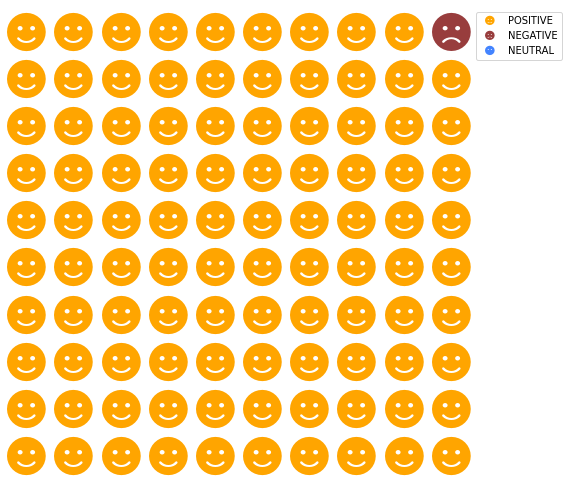

In [43]:
!pip install pywaffle
import matplotlib.pyplot as plt
from pywaffle import Waffle
fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    values=[round(sum(speeches_polarity_desc['Sentiment_Type']=='Positive')/922)*100-1,round(sum(speeches_polarity_desc['Sentiment_Type']=='Negative')/922)+1 ,sum(speeches_polarity_desc['Sentiment_Type']=='Neutral')],
    colors=["#FFA500", "#983D3D" ,"#4384FF"],
    icons=['smile', 'frown', 'meh-blank'],
    font_size=40,
    icon_style='solid',
    icon_legend=True,
    figsize=(8,8),
    legend={
        'labels': ['POSITIVE', 'NEGATIVE', 'NEUTRAL'], 
        'loc': 'upper left', 
        'bbox_to_anchor': (1, 1)
    }
)

# Yearwise trends

In [172]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [173]:
df1 = pd.read_csv('https://raw.githubusercontent.com/tpavankalyan/ds203/master/PM_Modi_speeches.csv',sep=",")
df1 = df1[['date', 'title', 'lang', 'words', 'text']]
df1.head()

,date,title,lang,words,text
0,"Aug 30, 2020",PM’s address in the 15th Episode of ‘Mann Ki B...,en,21619,"My dear countrymen, Namaskar.\nGenerally, this..."
1,"Aug 29, 2020",PM’s address at inauguration of the College an...,en,10128,Our country’s Agriculture Minister Shri Narend...
2,"Aug 27, 2020",PM’s address at seminar on Atmanirbhar Bharat ...,en,8497,"My cabinet colleague, Shri Rajnath ji, Chief o..."
3,"Aug 15, 2020",PM’s address to the Nation from the ramparts o...,en,50260,"My dear countrymen,\nCongratulations and many ..."
4,"Aug 13, 2020",PM’s address at the Launch of ‘Transparent Tax...,en,11908,The process of Structural Reforms going on in ...


In [174]:
from google_trans_new import google_translator
translator=google_translator()
def HindiToEnglish(speech):
 trans = google_translator()
 txt = ''
 for x in range(538):# from max(char)
  txt = txt + trans.translate(speech[4500*x:4500*(x+1)])
 return txt

In [175]:
check = lambda x: x[-4:]
df1['year'] = [check(i) for i in df1['date']]
df1

,date,title,lang,words,text,year
0,"Aug 30, 2020",PM’s address in the 15th Episode of ‘Mann Ki B...,en,21619,"My dear countrymen, Namaskar.\nGenerally, this...",2020
1,"Aug 29, 2020",PM’s address at inauguration of the College an...,en,10128,Our country’s Agriculture Minister Shri Narend...,2020
2,"Aug 27, 2020",PM’s address at seminar on Atmanirbhar Bharat ...,en,8497,"My cabinet colleague, Shri Rajnath ji, Chief o...",2020
3,"Aug 15, 2020",PM’s address to the Nation from the ramparts o...,en,50260,"My dear countrymen,\nCongratulations and many ...",2020
4,"Aug 13, 2020",PM’s address at the Launch of ‘Transparent Tax...,en,11908,The process of Structural Reforms going on in ...,2020
...,...,...,...,...,...,...
917,"Oct 09, 2014",Text of the PM’s keynote address at the “Inves...,hi,21430,"भाइयों और बहनों,\nये ऐसा कार्यक्रम है, जिसमें ...",2014
918,"Oct 03, 2014",English rendering of text of PM’s first Mann K...,en,11169,"My Dear Countrymen,\nToday is the holy festiva...",2014
919,"Oct 03, 2014",Text of PM’s first Mann ki Baat to the Nation ...,hi,10312,"मेरे प्यारे देशवासियो,\nआज विजयदशमी का पावन पर...",2014
920,"Oct 02, 2014",Text of PM’s address during launch of ‘Swachh ...,hi,15605,भारत माता की जय!\nमहात्मा गांधी अमर रहे! महात्...,2014


In [176]:
df1_yr = df1[['year','text']]
df1_yr['text'] = df1_yr.groupby(['year'])['text'].transform(lambda x:' '.join(x))
df1_yr = df1_yr.drop_duplicates()
df1_yr

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,year,text
0,2020,"My dear countrymen, Namaskar.\nGenerally, this..."
99,2019,"My dear countrymen, Namaskar. The moment to bi..."
234,2018,"मंत्रिमंडल में मेरे सहयोगी अरुण जेटली जी, गिरि..."
347,2017,"My dear countrymen, Namaskar. This is the last..."
501,2016,"My fellow citizens,\n In a few hours, we will ..."
688,2015,"प्‍यारे भाइयों और बहनों,\n1857 के स्‍वतंत्र सं..."
877,2014,"मंत्री परिषद् के मेरे सभी साथी, और उपस्थित सभी..."


In [177]:
df1_yr.set_index('year',inplace=True)
df1_yr

,text
year,
2020,"My dear countrymen, Namaskar.\nGenerally, this..."
2019,"My dear countrymen, Namaskar. The moment to bi..."
2018,"मंत्रिमंडल में मेरे सहयोगी अरुण जेटली जी, गिरि..."
2017,"My dear countrymen, Namaskar. This is the last..."
2016,"My fellow citizens,\n In a few hours, we will ..."
2015,"प्‍यारे भाइयों और बहनों,\n1857 के स्‍वतंत्र सं..."
2014,"मंत्री परिषद् के मेरे सभी साथी, और उपस्थित सभी..."


In [178]:
df1_yr['char']=[len(i) for i in df1_yr['text']]
max(df1_yr['char'])


2419442

In [179]:
txt_yr = []
txt_yr.append(HindiToEnglish(df1_yr.loc['2020','text']))
txt_yr.append(HindiToEnglish(df1_yr.loc['2019','text']))
txt_yr.append(HindiToEnglish(df1_yr.loc['2018','text']))
txt_yr.append(HindiToEnglish(df1_yr.loc['2017','text']))
txt_yr.append(HindiToEnglish(df1_yr.loc['2016','text']))
txt_yr.append(HindiToEnglish(df1_yr.loc['2015','text']))
txt_yr.append(HindiToEnglish(df1_yr.loc['2014','text']))
df1_yr['txt'] = txt_yr
df1_yr

,text,char,txt
year,,,
2020,"My dear countrymen, Namaskar.\nGenerally, this...",1218620,"My dear countrymen, Namaskar.\nGenerally, this..."
2019,"My dear countrymen, Namaskar. The moment to bi...",1440267,"My dear countrymen, Namaskar. The moment to bi..."
2018,"मंत्रिमंडल में मेरे सहयोगी अरुण जेटली जी, गिरि...",1599516,"My colleagues in the Cabinet, Arun Jaitley, Gi..."
2017,"My dear countrymen, Namaskar. This is the last...",1924687,"My dear countrymen, Namaskar. This is the last..."
2016,"My fellow citizens,\n In a few hours, we will ...",2263836,"My fellow citizens,\n In a few hours, we will ..."
2015,"प्‍यारे भाइयों और बहनों,\n1857 के स्‍वतंत्र सं...",2419442,"Dear brothers and sisters,\nMeerut is particul..."
2014,"मंत्री परिषद् के मेरे सभी साथी, और उपस्थित सभी...",543550,"All my colleagues in the Council of Ministers,..."


##Yearwise Wordclouds

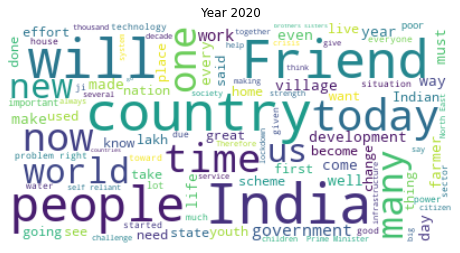

In [180]:
txt = df1_yr.txt['2020']
stopwords = set(STOPWORDS)
#stopwords.update(['Friends','must','will','Friend','Brother','Sister','Country','India'])
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100,
background_color="white").generate(txt)
fig = plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Year 2020')
plt.show()


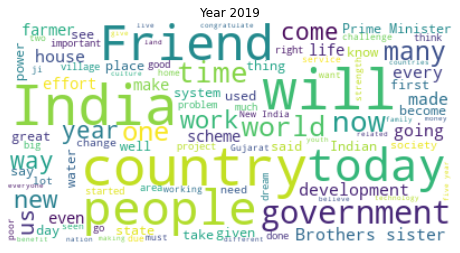

In [181]:
txt = df1_yr.txt['2019']
stopwords = set(STOPWORDS)
#stopwords.update(['Friends','must','will','Friend','Brother','Sister','Country','India'])
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100,
background_color="white").generate(txt)
fig = plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Year 2019')
plt.show()


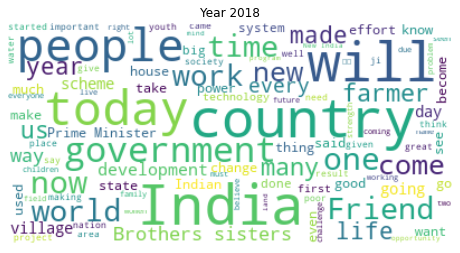

In [182]:
txt = df1_yr.txt['2018']
stopwords = set(STOPWORDS)
#stopwords.update(['Friends','must','will','Friend','Brother','Sister','Country','India'])
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100,
background_color="white").generate(txt)
fig = plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Year 2018')
plt.show()

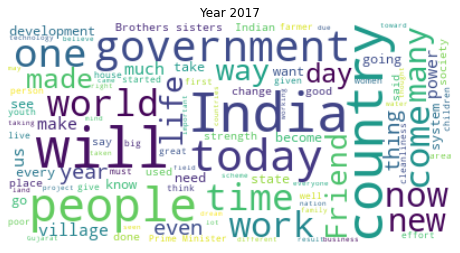

In [183]:
txt = df1_yr.txt['2017']
stopwords = set(STOPWORDS)
#stopwords.update(['Friends','must','will','Friend','Brother','Sister','Country','India'])
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100,
background_color="white").generate(txt)
fig = plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Year 2017')
plt.show()

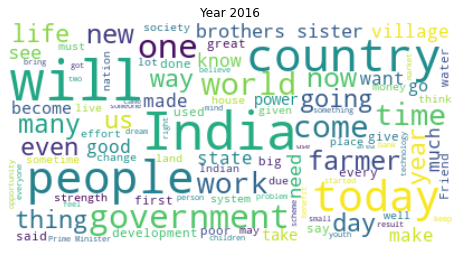

In [184]:
txt = df1_yr.txt['2016']
stopwords = set(STOPWORDS)
#stopwords.update(['Friends','must','will','Friend','Brother','Sister','Country','India'])
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100,
background_color="white").generate(txt)
fig = plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Year 2016')
plt.show()

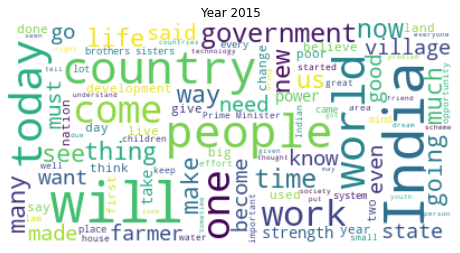

In [185]:
txt = df1_yr.txt['2015']
stopwords = set(STOPWORDS)
#stopwords.update(['Friends','must','will','Friend','Brother','Sister','Country','India'])
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100,
background_color="white").generate(txt)
fig = plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Year 2015')
plt.show()


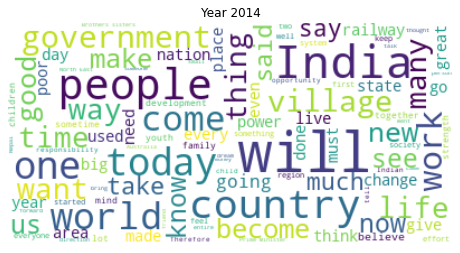

In [186]:
txt = df1_yr.txt['2014']
stopwords = set(STOPWORDS)
#stopwords.update(['Friends','must','will','Friend','Brother','Sister','Country','India'])
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100,
background_color="white").generate(txt)
fig = plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Year 2014')
plt.show()

In [187]:
df1_e = df1[df1['lang']=='en'].groupby('year').count()
df1_e = df1_e[['text']]
df1_h = df1[df1['lang']=='hi'].groupby('year').count()
df1_h = df1_h[['text']]
df1_e,df1_h

(      text
 year      
 2014    15
 2015    86
 2016    90
 2017    73
 2018    37
 2019    95
 2020    95,       text
 year      
 2014    30
 2015   103
 2016    97
 2017    81
 2018    76
 2019    40
 2020     4)

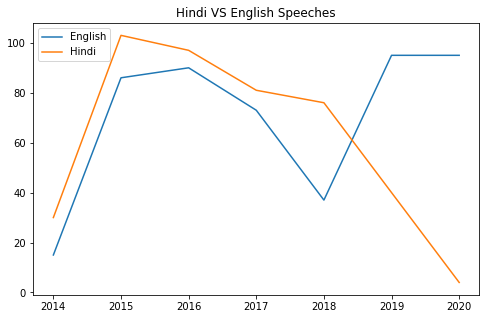

In [188]:
fig = plt.figure(figsize=(8,5))
plt.plot(df1_e, label = 'English')
plt.plot(df1_h, label = 'Hindi')
plt.title('Hindi VS English Speeches')
plt.legend()
plt.show()


In [189]:
import nltk
from nltk.corpus import stopwords
def Extract(speech):
 speech = str(np.char.lower(speech))
 new_speech = ""
 symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n,"
 for i in symbols:
  speech = str(np.char.replace(speech, i, ' '))
 for x in speech.split(' '):
  if x not in stopwords.words('english') and len(x)>1:
    new_speech = new_speech + ' ' + x
 new_speech = str(np.char.replace(new_speech, "'", ""))
 return new_speech



<input>:6: DeprecationWarning: invalid escape sequence \]
<input>:6: DeprecationWarning: invalid escape sequence \]
<input>:6: DeprecationWarning: invalid escape sequence \]
<input>:6: DeprecationWarning: invalid escape sequence \]
<input>:6: DeprecationWarning: invalid escape sequence \]
<input>:6: DeprecationWarning: invalid escape sequence \]
<input>:6: DeprecationWarning: invalid escape sequence \]
<input>:6: DeprecationWarning: invalid escape sequence \]
<input>:6: DeprecationWarning: invalid escape sequence \]
<input>:6: DeprecationWarning: invalid escape sequence \]
<input>:6: DeprecationWarning: invalid escape sequence \]
<input>:6: DeprecationWarning: invalid escape sequence \]
<input>:6: DeprecationWarning: invalid escape sequence \]
<input>:6: DeprecationWarning: invalid escape sequence \]
<input>:6: DeprecationWarning: invalid escape sequence \]
<input>:6: DeprecationWarning: invalid escape sequence \]
<input>:6: DeprecationWarning: invalid escape sequence \]
<input>:6: Dep

In [190]:
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
lemmatizer = WordNetLemmatizer()

def stemSentence(sentence):
 token_words = word_tokenize(sentence)
 stem_sentence = []
 for word in token_words:
  stem_sentence.append(lemmatizer.lemmatize(word))
 return " ".join(stem_sentence)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [191]:
def Process(speech):
 speech = Extract(speech)
 #speech = stemSentence(speech)
 speech = word_tokenize(speech)
 return speech

In [192]:
processed_text = []
from nltk.tokenize import word_tokenize


In [193]:
processed_text.append(Process(df1_yr.txt['2020']))

In [194]:
processed_text.append(Process(df1_yr.txt['2019']))

In [195]:
processed_text.append(Process(df1_yr.txt['2018']))

In [196]:
processed_text.append(Process(df1_yr.txt['2017']))

In [197]:
processed_text.append(Process(df1_yr.txt['2016']))

In [198]:
processed_text.append(Process(df1_yr.txt['2015']))

In [199]:
processed_text.append(Process(df1_yr.txt['2014']))

In [200]:
DF = {}
for i in range(len(processed_text)):
 tokens = processed_text[i]
 for w in tokens:
  try:
    DF[w].add(i)
  except:
    DF[w] = {i}
for i in DF:
 DF[i] = len(DF[i])
DF

{'dear': 7,
 'countrymen': 7,
 'namaskar': 6,
 'generally': 7,
 'period': 7,
 'full': 7,
 'festivals': 7,
 'fairs': 6,
 'held': 7,
 'various': 7,
 'places': 7,
 'it': 7,
 '’': 7,
 's': 7,
 'time': 7,
 'religious': 7,
 'ceremonies': 4,
 'times': 7,
 'corona': 1,
 'crises': 7,
 'one': 7,
 'hand': 7,
 'people': 7,
 'exaltation': 1,
 'enthusiasm': 7,
 'yet': 7,
 'way': 7,
 'there': 7,
 'also': 7,
 'discipline': 7,
 'touches': 5,
 'heart': 7,
 'broadly': 3,
 'speaking': 7,
 'feeling': 7,
 'responsibility': 7,
 'amongst': 7,
 'citizens': 7,
 'getting': 7,
 'along': 7,
 'day': 7,
 'tasks': 6,
 'taking': 7,
 'care': 7,
 'others': 7,
 'well': 7,
 'every': 7,
 'event': 7,
 'organised': 6,
 'country': 7,
 'kind': 7,
 'patience': 7,
 'simplicity': 7,
 'witnessed': 7,
 'unprecedented': 7,
 'even': 7,
 'ganeshotsav': 4,
 'celebrated': 7,
 'online': 7,
 'certain': 7,
 'eco': 7,
 'friendly': 7,
 'ganesh': 7,
 'idols': 5,
 'installed': 7,
 'friends': 7,
 'observe': 7,
 'minutely': 6,
 'thing': 7,
 'cer

In [127]:
total_vocab=[x for x in DF]
len(total_vocab)

37959

In [201]:
processed_text[0]

['dear',
 'countrymen',
 'namaskar',
 'generally',
 'period',
 'full',
 'festivals',
 'fairs',
 'held',
 'various',
 'places',
 'it',
 '’',
 's',
 'time',
 'religious',
 'ceremonies',
 'times',
 'corona',
 'crises',
 'one',
 'hand',
 'people',
 'full',
 'exaltation',
 'enthusiasm',
 'yet',
 'way',
 'there',
 '’',
 's',
 'also',
 'discipline',
 'touches',
 'heart',
 'broadly',
 'speaking',
 'way',
 'feeling',
 'responsibility',
 'amongst',
 'citizens',
 'people',
 'getting',
 'along',
 'day',
 'day',
 'tasks',
 'taking',
 'care',
 'others',
 'well',
 'every',
 'event',
 'organised',
 'country',
 'kind',
 'patience',
 'simplicity',
 'witnessed',
 'time',
 'unprecedented',
 'even',
 'ganeshotsav',
 'celebrated',
 'online',
 'certain',
 'places',
 'places',
 'eco',
 'friendly',
 'ganesh',
 'idols',
 'installed',
 'friends',
 'observe',
 'minutely',
 'one',
 'thing',
 'certainly',
 'draw',
 'attention',
 'festivals',
 'environment',
 'always',
 'deep',
 'connect',
 'two',
 'one',
 'hand',
 

In [222]:
'demonetization' in tokens

False

In [228]:
from collections import Counter
tf_idf2 = {}
N=7
tokens = {}
for x in range(N):
 tokens = set(tokens).union(set(processed_text[x]))
tokens =list(tokens)
for i in range(N):
 tokenx = processed_text[i]
 counter = Counter(tokenx)
 for token in np.unique(tokenx):
  tf = counter[token]/len(processed_text[i])
  df = DF[token]
  idf = np.log(N/(df))
  tf_idf2[i, token] = tf*idf
 for x in tokens:
  if x not in tokenx:
    tf_idf2[i, x] = 0
len(tf_idf2)

265713

In [229]:
for x in range(7):
 counter = Counter(processed_text[x])
 print(counter['ujjwala']," ",len(processed_text[x]))

8   112583
15   136131
25   155344
14   185384
4   215383
0   226681
0   50508


In [230]:

from nltk.corpus import stopwords
# multipling tf_idf value 10^5 for simplicity
df_new = {}
for x in tokens:
 l = []
 for y in range(N):
    l.append(tf_idf2[y,x]*100000)
 df_new[x]=l
df_new

{'mohinijhanwar': [1.7284227183991483, 0, 0, 0, 0, 0, 0],
 'ekam': [0,
  0,
  0.5454332709259474,
  0.9141003111241571,
  0,
  0.7475684864520658,
  0],
 'lighting': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'appreciate': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'pemagyamtsho': [0, 1.4294393995895962, 0, 0, 0, 0, 0],
 'brahmadesh': [0, 0, 0, 1.0496645606175903, 0, 0, 0],
 'mariners': [0, 0, 0, 0, 0, 0.8584354882214713, 0],
 'runway': [0, 0, 0, 1.0496645606175903, 0, 0, 0],
 'civilized': [0,
  0,
  1.636299812777842,
  0.9141003111241571,
  0.3933912427569509,
  0,
  0],
 'jeekar': [0, 0, 0, 1.0496645606175903, 0, 0, 0],
 'viharas': [0, 0, 1.2526458370167584, 0, 0, 0, 0],
 'drops': [0,
  0.49433595084325077,
  0.21659815417474307,
  0.36300029843051496,
  0,
  0.44530274256053165,
  0.6661761238243702],
 'stole': [0, 0, 0, 0.6757665000730204, 0.5816443119909037, 0, 0],
 'व्रतपते': [1.7284227183991483, 0, 0, 0, 0, 0, 0],
 'wreck': [0, 1.4294393995895962, 0, 0, 0, 0, 0],
 'kanchipurna': [0, 0, 0

In [214]:
df_new = pd.DataFrame(df_new)
df_new

,colleagues,council,ministers,dignitaries,present,sitting,since,feeling,tired,related,topics,also,studying,deal,general,nature,government,secrecy,occasion,today,experience,openness,thinks,things,come,know,much,rti,get,system,developed,that…,way,seen,budget,comes,lot,delegations,memorandum,becomes,...,remarked,echoed,legends,ascetics,that,viveknanda,render,untrue,ensconced,incumbent,bounty,multi,dimensional,om,empire,eradication,neighbouring,siddharth,arrow,swan,killer,saviour,replied,concert,imperative,marked,13,14,destined,wholeheartedly,para,राष्ट्रयाम,जाग्रयाम्,वयम्,vigilance,price,scales,loudly,vande,mataram
0,-16.460203,-5.620557,-8.832304,-4.416152,-27.701317,-13.248456,-23.285165,-15.657266,-3.613215,-39.343899,-4.416152,-541.982286,-6.423494,-6.022025,-8.430836,-20.876355,-199.529775,0.000000,-21.277823,-302.707143,-25.693975,-3.211747,-2.007342,-47.373266,-124.053723,-77.081925,-72.665773,0.000000,-109.199394,-45.767393,-15.255798,-0.316811,-100.768558,-50.986482,-14.452861,-20.876355,-67.848153,0.000000,0.000000,-15.657266,...,0.000000,0.000000,0.000000,0.0,-14.452861,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.204405,0.0,-1.605873,0.000000,0.000000,-0.711642,0.000000,0.000000,0.000000,0.000000,1.505197,0.000000,0.000000,-4.014684,-1.204405,-4.817620,-6.022025,0.136922,-1.204405,1.494330,0.000000,0.000000,0.000000,-0.950432,-10.438177,-1.584053,-2.007342,-2.810279,-2.408810
1,-24.237620,-8.964599,-14.276954,-7.968532,-38.846596,-14.608976,-27.557842,-14.276954,-1.992133,-50.135350,-4.980333,-546.176498,-1.992133,-9.296621,-8.300555,-21.249420,-295.167724,0.000000,-24.237620,-331.690165,-23.241553,-0.664044,-1.660111,-61.424105,-131.812808,-84.997680,-74.704992,0.000000,-107.243166,-68.728593,-8.964599,-0.524017,-106.579122,-50.467372,-18.593242,-18.593242,-67.732526,-0.262009,-0.262009,-11.952799,...,-0.098090,0.000000,-0.098090,0.0,-6.640444,0.000000,-0.262009,0.000000,0.000000,1.867241,0.000000,-2.324155,0.0,-2.324155,-0.098090,-0.738449,-0.294271,0.000000,0.113237,0.000000,0.000000,0.000000,0.339711,0.000000,-1.328089,-1.328089,-5.312355,-6.640444,0.113237,-1.660111,0.741504,0.000000,0.000000,0.000000,-0.524017,-8.300555,0.000000,-2.656177,-5.976399,-3.320222
2,-29.095757,-6.401066,-15.129794,-8.437769,-27.640969,-23.567563,-21.239902,-14.838836,-3.200533,-36.660654,-4.655321,-544.090651,-4.364364,-5.819151,-6.982982,-21.530860,-339.838439,0.000000,-20.948945,-324.417688,-27.640969,-0.872873,-4.364364,-63.137792,-152.461765,-83.213864,-83.504822,0.000000,-123.656966,-60.519174,-18.330327,0.000000,-85.832482,-50.335659,-37.824484,-30.550545,-54.990980,-0.688810,-0.688810,-19.203199,...,-0.085959,0.000000,-0.171917,0.0,-0.581915,0.000000,-0.459207,0.000000,0.000000,0.000000,-0.161779,-4.073406,0.0,-1.163830,-0.429793,0.000000,0.000000,0.000000,0.099232,0.000000,0.000000,0.000000,0.396927,0.000000,-1.454788,-1.454788,-5.528194,-10.765430,0.000000,-0.581915,1.949383,0.000000,0.000000,0.000000,0.000000,-15.420751,-1.377620,-1.163830,-3.782448,-2.618618
3,-9.264788,-10.483839,-11.946700,-4.388584,-23.405780,-24.137211,-22.186729,-16.822905,-0.975241,-15.360043,-3.169533,-435.445039,-4.632394,-2.925723,-9.020978,-35.840101,-276.480781,0.000000,-25.600072,-282.576036,-32.670568,-0.975241,-3.413343,-80.457370,-161.158550,-93.379311,-102.400289,0.000000,-118.979384,-74.849735,-18.773386,-0.384796,-108.495544,-51.931575,-16.822905,-36.327722,-54.613488,-0.384796,-0.192398,-21.211488,...,-0.072030,-0.072030,-0.144059,0.0,-1.219051,0.000000,-0.192398,0.000000,0.000000,0.000000,-0.135564,-2.438102,0.0,-1.462861,0.000000,-0.135564,-0.432178,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.975241,-0.975241,-4.144774,-7.314306,0.000000,-0.731431,0.000000,0.000000,0.000000,0.000000,-0.769592,-7.558117,-2.116377,-0.487620,-3.900963,-2.194292
4,-3.357629,-16.158589,-15.529034,-5.665999,-20.145774,-31.897475,-22.454144,-12.381257,-2.308370,-8.394072,-4.406888,-411.099696,-2.937925,-3.987184,-8.603924,-31.

##Initiatives by Modi Government
Top 10 initiatives by the modi government are:

1. Mann ki baat
2. Swachh Bharat Mission
3. Made in India, FDI,Startup India, Mudra yojna
4. Jan Dhan Yojana and Ujjawal Yojna
5. Affordable healthcare
6. Implementation of GST
7. Expansion of electricity and roads
8. triple talaq bill
9. push for Yoga
10. Digital India

In [231]:
df_init = pd.DataFrame({'year':[2020,2019,2018,2017,2016,2015,2014]})
init_yr = {}
df_leap = pd.DataFrame({'year':[2020,2019,2018,2017,2016,2015,2014]})

In [232]:
# was decided in year 2014 and implemented in 2015
df_init['yoga']=df_new['yoga']
df_leap['yoga']=df_new['yoga']
init_yr['yoga'] = '2014'
df_new['yoga']

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [233]:
# started from 3 oct 2014
df_init['mann ki baat']=df_new['mann']
df_leap['mann ki baat']=df_new['mann']
init_yr['mann ki baat']='2014'
df_new['mann']

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [234]:
# on tuesday,8 october 2016
df_init['demonetisation']=df_new['demonetisation']
df_leap['demonetisation']=df_new['demonetisation']
init_yr['demonetisation']='2016'
df_new['demonetisation']

[0.2988659359061429,
 0.49433595084325077,
 0.6497944625242291,
 3.993003282735664,
 0.7811021218508725,
 0,
 0]

In [235]:
# implemented on 2 oct 2014
df_init['Swachh Bharat Abhiyaan']=df_new['swachh']
df_leap['Swachh Bharat Abhiyaan']=df_new['swachh']
init_yr['Swachh Bharat Abhiyaan']='2014'
df_new['swachh'],df_new['bharat']

([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [236]:
# discussed in late 2015 implemented in jan 2016
df_init['Startup India']=df_new['startup']
df_leap['Startup India']=df_new['startup']
init_yr['Startup India']='2015'
df_new['startup']
# implemented on 25 september 2014
df_init['Make in India']=df_new['make']
df_leap['Make in India']=df_new['make']
init_yr['Make in India']='2014'
df_new['make']

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [237]:
# launched in year 2014
df_new['jan'],df_new['dhan']
init_yr['Jan Dhan Yojna'] = '2014'
df_init['Jan Dhan Yojna'] = df_new['dhan']
df_leap['Jan Dhan Yojna'] = df_new['dhan']
df_init['Jan Dhan Yojna']

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
Name: Jan Dhan Yojna, dtype: float64

In [238]:
# articulated in 2006-07 and came into effect in 2017 and
df_init['GST']=df_new['gst']
df_leap['GST']=df_new['gst']
init_yr['GST'] = '2017'
df_new['gst']

[2.464592555617323,
 4.642717583002837,
 4.862359223102057,
 9.72879511704852,
 3.005960801337548,
 0.5440268212236873,
 0]

In [239]:
# implemented on 1 May 2016
check = lambda x,y: min(x,y)
df_init['Ujjwala Yojna'] = [check(i,j) for i,j in zip(df_new['ujjwala'],df_new['yojna'])]
df_leap['Ujjwala Yojna']=df_init['Ujjwala Yojna']
init_yr['Ujjwala Yojna']='2016'

In [240]:
# implemented in 2015
df_init['beti bachchao,beti padhao'] = df_new['padhao']
df_leap['beti bachchao,beti padhao']= df_new['padhao']
init_yr['beti bachchao,beti padhao']='2015'
df_new['padhao']

[0.2988659359061429,
 0,
 1.0829907708737154,
 1.4520011937220598,
 1.0935429705912214,
 1.9296452177623038,
 0]

In [241]:
# passed in 2019
df_new['triple'],df_new['talaq']
check = lambda x,y: min(x,y)
df_init['Triple Talaq'] = [check(i,j) for i,j in zip(df_new['triple'],df_new['talaq'])]
df_leap['Triple Talaq'] = df_init['Triple Talaq']

init_yr['Triple Talaq']='2019'
df_init['road']=df_new['road']
df_leap['road']=df_new['road']

init_yr['road']='2014'
df_init['electricity']=df_new['electricity']
df_leap['electricity']=df_new['electricity']
init_yr['electricity']='2014'

df_init['health']=df_new['health']
df_leap['health']=df_new['health']
init_yr['health']='2014'

# first case in India in 2020
df_init['corona']=df_new['corona']
df_leap['corona']=df_new['corona']
init_yr['corona']='2020'

In [242]:
df_init.sort_values(by='year',inplace=True)
df_init.set_index('year',inplace=True)
df_init

,yoga,mann ki baat,demonetisation,Swachh Bharat Abhiyaan,Startup India,Make in India,Jan Dhan Yojna,GST,Ujjwala Yojna,"beti bachchao,beti padhao",Triple Talaq,road,electricity,health,corona
year,,,,,,,,,,,,,,,
2014,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
2015,0.0,0.0,0.000000,0.0,0.544027,0.0,0.0,0.544027,0.000000,1.929645,0.000000,0.0,0.0,0.0,0.000000
2016,0.0,0.0,0.781102,0.0,0.429423,0.0,0.0,3.005961,0.624882,1.093543,0.000000,0.0,0.0,0.0,0.000000
2017,0.0,0.0,3.993003,0.0,0.997825,0.0,0.0,9.728795,1.247281,1.452001,1.815001,0.0,0.0,0.0,0.000000
2018,0.0,0.0,0.649794,0.0,0.893086,0.0,0.0,4.862359,0.198464,1.082991,1.732785,0.0,0.0,0.0,0.000000
2019,0.0,0.0,0.494336,0.0,1.245607,0.0,0.0,4.642718,0.113237,0.000000,2.966016,0.0,0.0,0.0,0.000000
2020,0.0,0.0,0.298866,0.0,0.410765,0.0,0.0,2.464593,0.410765,0.298866,2.988659,0.0,0.0,0.0,580.750033


In [243]:
df_leap.set_index('year',inplace=True)
df_leap = df_leap.transpose()
df_leap

year,2020,2019,2018,2017,2016,2015,2014
yoga,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
mann ki baat,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
demonetisation,0.298866,0.494336,0.649794,3.993003,0.781102,0.000000,0.0
Swachh Bharat Abhiyaan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Startup India,0.410765,1.245607,0.893086,0.997825,0.429423,0.544027,0.0
Make in India,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Jan Dhan Yojna,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
GST,2.464593,4.642718,4.862359,9.728795,3.005961,0.544027,0.0
Ujjwala Yojna,0.410765,0.113237,0.198464,1.247281,0.624882,0.000000,0.0
"beti bachchao,beti padhao",0.298866,0.000000,1.082991,1.452001,1.093543,1.929645,0.0


In [244]:
df_leap[2020] = df_leap[2020]-df_leap[2019]
df_leap[2019] = df_leap[2019]-df_leap[2018]
df_leap[2018] = df_leap[2018]-df_leap[2017]
df_leap[2017] = df_leap[2017]-df_leap[2016]
df_leap[2016] = df_leap[2016]-df_leap[2015]
df_leap[2015] = df_leap[2015]-df_leap[2014]
df_leap = df_leap.transpose()
df_leap

,yoga,mann ki baat,demonetisation,Swachh Bharat Abhiyaan,Startup India,Make in India,Jan Dhan Yojna,GST,Ujjwala Yojna,"beti bachchao,beti padhao",Triple Talaq,road,electricity,health,corona
year,,,,,,,,,,,,,,,
2020,0.0,0.0,-0.195470,0.0,-0.834842,0.0,0.0,-2.178125,0.297528,0.298866,0.022644,0.0,0.0,0.0,580.750033
2019,0.0,0.0,-0.155459,0.0,0.352521,0.0,0.0,-0.219642,-0.085227,-1.082991,1.233230,0.0,0.0,0.0,0.000000
2018,0.0,0.0,-3.343209,0.0,-0.104739,0.0,0.0,-4.866436,-1.048818,-0.369010,-0.082216,0.0,0.0,0.0,0.000000
2017,0.0,0.0,3.211901,0.0,0.568402,0.0,0.0,6.722834,0.622400,0.358458,1.815001,0.0,0.0,0.0,0.000000
2016,0.0,0.0,0.781102,0.0,-0.114604,0.0,0.0,2.461934,0.624882,-0.836102,0.000000,0.0,0.0,0.0,0.000000
2015,0.0,0.0,0.000000,0.0,0.544027,0.0,0.0,0.544027,0.000000,1.929645,0.000000,0.0,0.0,0.0,0.000000
2014,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [245]:
df_init.loc[2014,'yoga']

0.0

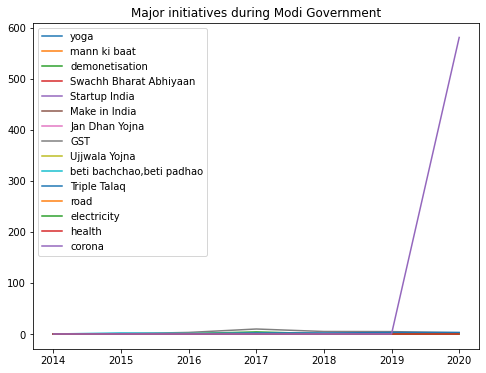

In [246]:
fig = plt.figure(figsize=(8,6))
for x in df_init.columns:
 plt.plot(df_init[x],label=x)
plt.title('Major initiatives during Modi Government')
plt.legend()
plt.savefig('graph1.jpg')
plt.show()

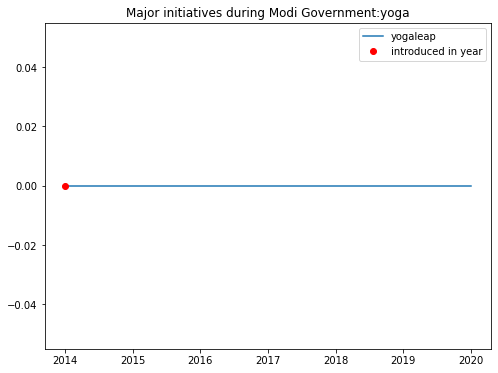

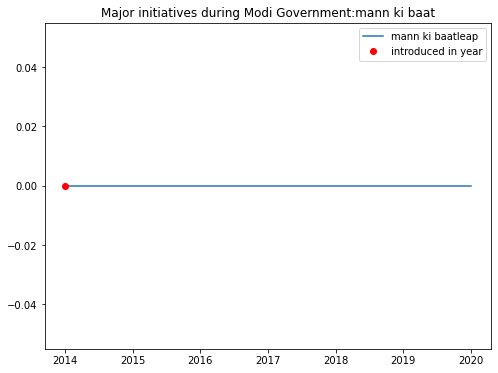

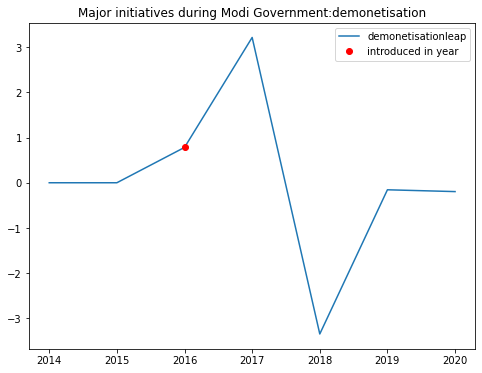

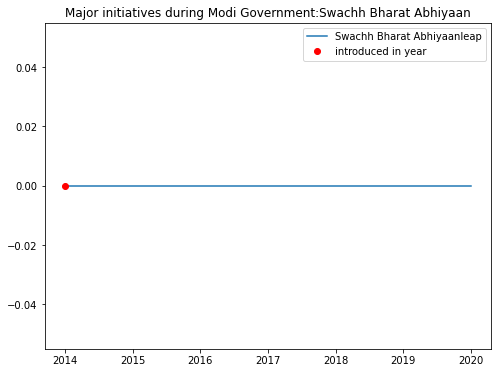

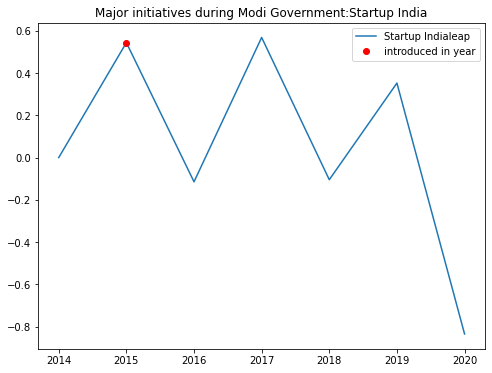

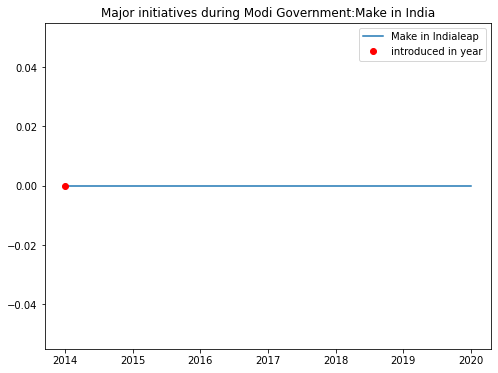

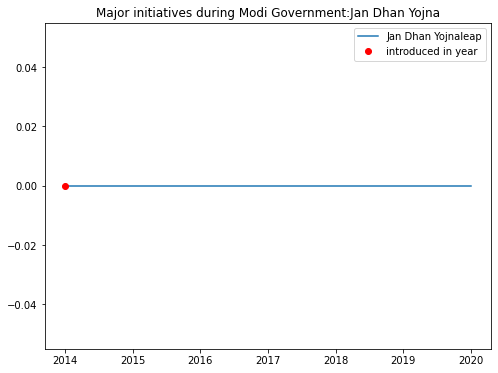

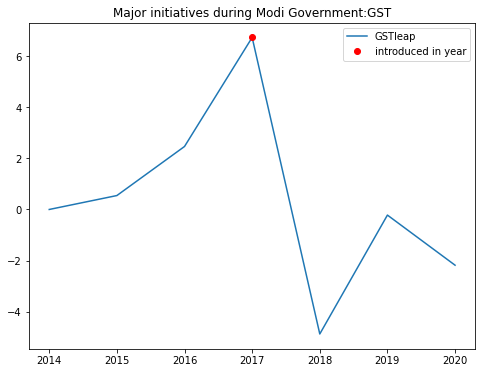

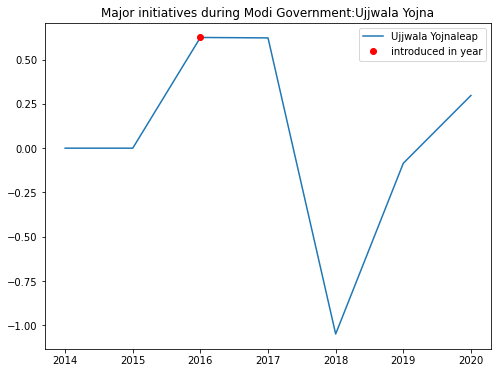

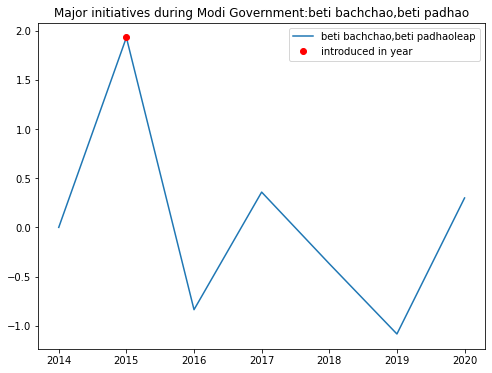

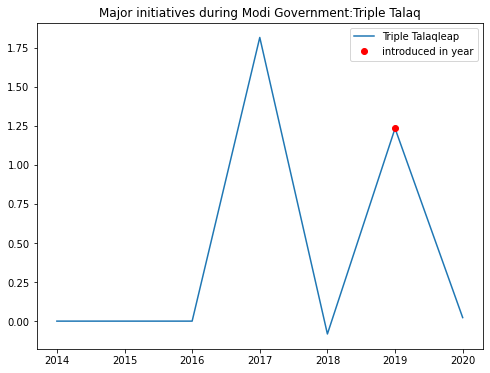

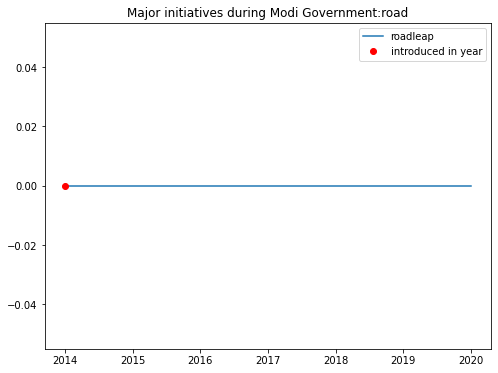

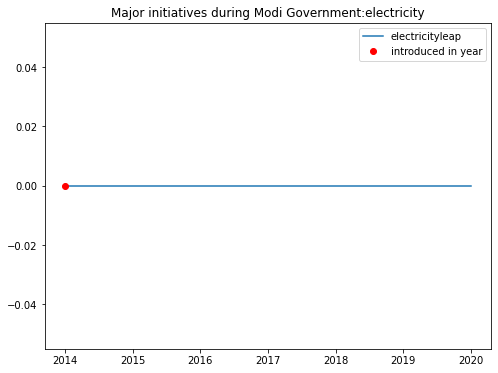

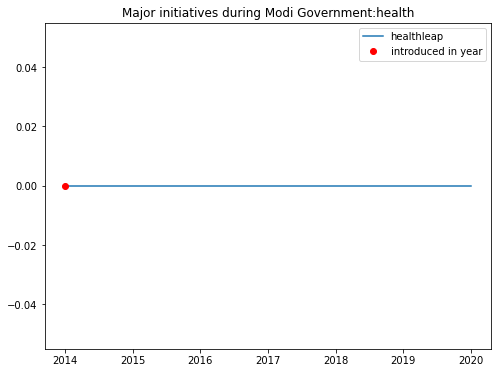

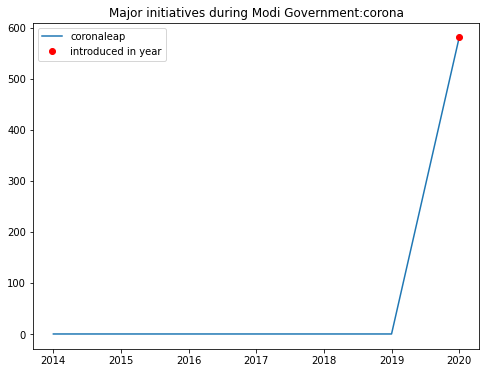

In [247]:
for x in df_init.columns:
 fig = plt.figure(figsize=(8,6))
 plt.plot(df_leap[x],label=x+'leap')
 plt.plot(int(init_yr[x]),df_leap.loc[int(init_yr[x]),x],'ro',label='introduced in year')
 plt.title('Major initiatives during Modi Government:'+x)
 plt.legend()
 plt.savefig(x+'.jpg')
 plt.show()

In [251]:
most_common = []
for x in tokens:
 if (list(df_new[x]) == [0.0,0.0,0.0,0.0,0.0,0.0,0.0]):
  most_common.append(x)
len(most_common)
most_common

['lighting',
 'appreciate',
 'multi',
 'fear',
 'speech',
 'businesses',
 'known',
 'appears',
 'rs',
 'hyderabad',
 'established',
 'deliver',
 'institute',
 'qualified',
 'sit',
 'mass',
 'consciousness',
 'specialty',
 'movement',
 'applause',
 'gujarat',
 'prove',
 'different',
 'believed',
 'nuances',
 'birth',
 '21',
 'उनकी',
 'unit',
 'eliminate',
 'cure',
 'elders',
 '45',
 'swaraj',
 'helping',
 'greetings',
 'negative',
 'psyche',
 'advantage',
 'medium',
 'destroys',
 'costs',
 'five',
 'waters',
 'try',
 'february',
 'wars',
 'also',
 'ie',
 'सबको',
 'bright',
 'corporate',
 'events',
 'claim',
 'centre',
 'entry',
 'drink',
 'living',
 'court',
 'sectors',
 'brings',
 'south',
 'leaders',
 'blame',
 'democratic',
 'zeal',
 'depends',
 'finding',
 'projects',
 'maldives',
 'talented',
 'implement',
 'enormous',
 'bottom',
 'collaborating',
 'thirds',
 'implemented',
 'break',
 'beloved',
 'sow',
 'arrive',
 'extends',
 'imagine',
 'discussing',
 'grown',
 'centenary',
 'tri

##Binary Classifier

In [271]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
df = pd.read_csv('https://raw.githubusercontent.com/tpavankalyan/ds203/master/PM_Modi_speeches.csv',sep=",")
df = df[['date', 'title', 'lang', 'words', 'text']]
# Analysis for year 2020 and 2019 for precovid and post covid analysis
check = lambda x: x[-4:]
df['year'] = [check(i) for i in df['date']]
df.head()


,date,title,lang,words,text,year
0,"Aug 30, 2020",PM’s address in the 15th Episode of ‘Mann Ki B...,en,21619,"My dear countrymen, Namaskar.\nGenerally, this...",2020
1,"Aug 29, 2020",PM’s address at inauguration of the College an...,en,10128,Our country’s Agriculture Minister Shri Narend...,2020
2,"Aug 27, 2020",PM’s address at seminar on Atmanirbhar Bharat ...,en,8497,"My cabinet colleague, Shri Rajnath ji, Chief o...",2020
3,"Aug 15, 2020",PM’s address to the Nation from the ramparts o...,en,50260,"My dear countrymen,\nCongratulations and many ...",2020
4,"Aug 13, 2020",PM’s address at the Launch of ‘Transparent Tax...,en,11908,The process of Structural Reforms going on in ...,2020


In [272]:
df2020 = df[df['year'] == '2020']
df2019 = df[df['year'] == '2019']
df2020.shape, df2019.shape

((99, 6), (135, 6))

In [273]:
max(list(df2020['words'])),max(list(df2019['words']))

(67568, 52932)

In [274]:
from google_trans_new import google_translator
def HindiToEnglish(speech):
 trans = google_translator()
 txt = ''
 for x in range(16):# from max(char)
  txt = txt + trans.translate(speech[4500*x:4500*(x+1)])
 return txt

In [275]:
txt2020 = []
for x in range(99):
 if df2020.loc[x,'lang'] == 'en':
  txt2020.append(df2020.loc[x,'text'])
 else:
  txt2020.append(HindiToEnglish(df2020.loc[x,'text']))

txt2019 = []
for x in range(99,160):
 if df2019.loc[x,'lang'] == 'en':
  txt2019.append(df2019.loc[x,'text'])
 else:
  txt2019.append(HindiToEnglish(df2019.loc[x,'text']))
for x in range(160,234):
 if df2019.loc[x,'lang'] == 'en':
  txt2019.append(df2019.loc[x,'text'])
 else:
  txt2019.append(HindiToEnglish(df2019.loc[x,'text']))
df2020['txt'] = txt2020
df2019['txt'] = txt2019

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [276]:
Corpus = pd.concat([df2020,df2019])
Corpus = Corpus[['date', 'title', 'lang', 'words', 'text', 'year', 'txt']]
Corpus

,date,title,lang,words,text,year,txt
0,"Aug 30, 2020",PM’s address in the 15th Episode of ‘Mann Ki B...,en,21619,"My dear countrymen, Namaskar.\nGenerally, this...",2020,"My dear countrymen, Namaskar.\nGenerally, this..."
1,"Aug 29, 2020",PM’s address at inauguration of the College an...,en,10128,Our country’s Agriculture Minister Shri Narend...,2020,Our country’s Agriculture Minister Shri Narend...
2,"Aug 27, 2020",PM’s address at seminar on Atmanirbhar Bharat ...,en,8497,"My cabinet colleague, Shri Rajnath ji, Chief o...",2020,"My cabinet colleague, Shri Rajnath ji, Chief o..."
3,"Aug 15, 2020",PM’s address to the Nation from the ramparts o...,en,50260,"My dear countrymen,\nCongratulations and many ...",2020,"My dear countrymen,\nCongratulations and many ..."
4,"Aug 13, 2020",PM’s address at the Launch of ‘Transparent Tax...,en,11908,The process of Structural Reforms going on in ...,2020,The process of Structural Reforms going on in ...
...,...,...,...,...,...,...,...
229,"Jan 25, 2019",PM’s Press Statement during state visit of Pre...,en,3263,"Your Excellency, President Ramaphosa,\n Distin...",2019,"Your Excellency, President Ramaphosa,\n Distin..."
230,"Jan 22, 2019",PM’s address at the 15th Pravasi Bharatiya Div...,hi,15771,"मॉरिशस के प्रधानमंत्री your excellency, प्रवीन...",2019,"Prime Minister of Mauritius your excellency, P..."
231,"Jan 19, 2019",PM’s address at the inauguration of National M...,hi,32086,"यहां उपस्थित सिने जगत से जुड़े हुए सभी रथी, मह...",2019,"All the chariots, maharathis associated with t..."
232,"Jan 19, 2019",PM’s speech at foundation laying ceremony of v...,hi,15527,मेरे प्‍यारे भाइयों-बहनों।\nआज प्रधान सेवक के ...,2019,My dear brothers and sisters.\nToday I am once...


In [281]:
Corpus['txt'].dropna(inplace=True)
Corpus['txt'] = [entry.lower() for entry in Corpus['txt']]
Corpus['txt']= [word_tokenize(entry) for entry in Corpus['txt']]
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

for index,entry in enumerate(Corpus['txt']):
  Final_words = []
  word_Lemmatized = WordNetLemmatizer()
  for word, tag in pos_tag(entry):
    if word not in stopwords.words('english') and word.isalpha:
      word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
      Final_words.append(word_Final)
  Corpus.loc[index,'text_final'] = str(Final_words)

In [282]:
Corpus.head()

,date,title,lang,words,text,year,txt,text_final
0,"Aug 30, 2020",PM’s address in the 15th Episode of ‘Mann Ki B...,en,21619,"My dear countrymen, Namaskar.\nGenerally, this...",2020,"[my, dear, countrymen, ,, namaskar, ., general...","['dear', 'countryman', ',', 'namaskar', '.', '..."
1,"Aug 29, 2020",PM’s address at inauguration of the College an...,en,10128,Our country’s Agriculture Minister Shri Narend...,2020,"[our, country, ’, s, agriculture, minister, sh...","['country', '’', 'agriculture', 'minister', 's..."
2,"Aug 27, 2020",PM’s address at seminar on Atmanirbhar Bharat ...,en,8497,"My cabinet colleague, Shri Rajnath ji, Chief o...",2020,"[my, cabinet, colleague, ,, shri, rajnath, ji,...","['cabinet', 'colleague', ',', 'shri', 'rajnath..."
3,"Aug 15, 2020",PM’s address to the Nation from the ramparts o...,en,50260,"My dear countrymen,\nCongratulations and many ...",2020,"[my, dear, countrymen, ,, congratulations, and...","['dear', 'countryman', ',', 'congratulation', ..."
4,"Aug 13, 2020",PM’s address at the Launch of ‘Transparent Tax...,en,11908,The process of Structural Reforms going on in ...,2020,"[the, process, of, structural, reforms, going,...","['process', 'structural', 'reform', 'go', 'cou..."


In [288]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus['text_final'],Corpus['year'],test_size=0.3,random_state=42)

In [290]:
Val_X, Test_X, Val_Y, Test_Y = model_selection.train_test_split(Test_X,Test_Y,test_size=0.5,random_state=42)


In [292]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Val_Y = Encoder.fit_transform(Val_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [293]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(Corpus['text_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)
Val_X_Tfidf = Tfidf_vect.transform(Val_X)
print(Tfidf_vect.vocabulary_)

{'dear': 1194, 'countryman': 1099, 'namaskar': 2964, 'generally': 1912, 'period': 3270, 'full': 1866, 'festival': 1732, 'fair': 1686, 'hold': 2126, 'various': 4676, 'place': 3313, 'time': 4443, 'religious': 3693, 'ceremony': 803, 'corona': 1080, 'crisis': 1128, 'one': 3120, 'hand': 2021, 'people': 3261, 'enthusiasm': 1553, 'yet': 4866, 'way': 4773, 'also': 280, 'discipline': 1342, 'touch': 4472, 'heart': 2070, 'broadly': 700, 'speak': 4138, 'feeling': 1723, 'responsibility': 3747, 'amongst': 307, 'citizen': 864, 'get': 1922, 'along': 277, 'day': 1187, 'task': 4338, 'take': 4325, 'care': 765, 'others': 3160, 'well': 4791, 'every': 1604, 'event': 1601, 'organise': 3153, 'country': 1098, 'kind': 2510, 'patience': 3238, 'simplicity': 4048, 'witness': 4830, 'unprecedented': 4613, 'even': 1599, 'celebrate': 789, 'online': 3124, 'certain': 804, 'eco': 1454, 'friendly': 1854, 'ganesh': 1890, 'instal': 2325, 'friend': 1853, 'observe': 3092, 'thing': 4412, 'certainly': 805, 'draw': 1411, 'attent

In [300]:
# Classifier - Algorithm - SVM
for i in [0.01,0.01, 0.1,1]:
 SVM = svm.SVC(C=i, kernel='linear',degree=3, gamma='auto')
 SVM.fit(Train_X_Tfidf,Train_Y)
 predictions_SVM = SVM.predict(Val_X_Tfidf)
 print("SVM Accuracy Score for C=",i,":",accuracy_score(predictions_SVM, Val_Y)*100)


SVM Accuracy Score for C= 0.01 : 65.71428571428571
SVM Accuracy Score for C= 0.01 : 65.71428571428571
SVM Accuracy Score for C= 0.1 : 65.71428571428571
SVM Accuracy Score for C= 1 : 80.0


In [301]:
# Classifier - Algorithm - SVM
for i in range(1,10):
 SVM = svm.SVC(C=i, kernel='linear',degree=i, gamma='auto')
 SVM.fit(Train_X_Tfidf,Train_Y)
 predictions_SVM = SVM.predict(Val_X_Tfidf)
 print("SVM Accuracy Score for degree=",i,":",accuracy_score(predictions_SVM, Val_Y)*100)


SVM Accuracy Score for degree= 1 : 80.0
SVM Accuracy Score for degree= 2 : 82.85714285714286
SVM Accuracy Score for degree= 3 : 85.71428571428571
SVM Accuracy Score for degree= 4 : 85.71428571428571
SVM Accuracy Score for degree= 5 : 88.57142857142857
SVM Accuracy Score for degree= 6 : 88.57142857142857
SVM Accuracy Score for degree= 7 : 88.57142857142857
SVM Accuracy Score for degree= 8 : 88.57142857142857
SVM Accuracy Score for degree= 9 : 88.57142857142857


In [302]:
#so, C is 1 and degree is 3
SVM = svm.SVC(C=1.0, kernel='linear',degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
predictions_SVM = SVM.predict(Test_X_Tfidf)
print("SVM Accuracy Score for C=1,degree=3",":",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score for C=1,degree=3 : 69.44444444444444


#Summarization

### Chosing sample text to summarize

In [303]:
import pandas as pd
data=pd.read_csv('https://raw.githubusercontent.com/zeelshah00000/DS203/main/PM_Modi_speeches.csv')
sample=data[data['title']=='PM’s address on the occasion of Dharma Chakra Day']['text'].iloc[0]
sample

'Respected President Shri Ram Nath Kovind Ji, other distinguished guests. Let me begin by conveying my greetings on Ashadha Poornima. It is also known as Guru Purnima. This is a day to remember our Gurus, who gave us knowledge. In that spirit, we pay homage to Lord Buddha.\nI am happy that copies of the Mongolian Kanjur are being presented to the Government of Mongolia. The Mongolian Kanjur is widely respected in Mongolia. Most monasteries have a copy of it.\nFriends, the eight-fold path of Lord Buddha shows the way towards the well-being of many societies and nations. It highlights the importance of compassion and kindness. The teachings of Lord Buddha celebrate simplicity both in thought and action. Buddhism teaches respect. Respect for people. Respect for the poor. Respect for women. Respect for peace and non-violence. Therefore, the teachings of Buddhism are the means to a sustainable planet.\nFriends, in his very first sermon in Sarnath, and his teachings after that, Lord Buddha s

## Extractive Summarization
Extractive method — Selecting the n numbers of most important sentences from the article that most probably convey the message of the article. 

###Term Frequency

In [304]:
#importing libraries

import bs4
import urllib.request as url
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk import sent_tokenize
from nltk.corpus import stopwords
from nltk import word_tokenize
stop_word = stopwords.words('english')
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [305]:
#processing data
#removing special characters, comma , etc.

processed = sample.replace(r'^\s+|\s+?$','')
processed = processed.replace('\n',' ')
processed = processed.replace("\\",'')
processed = processed.replace(",",'')
processed = processed.replace('"','')
processed = re.sub(r'\[[0-9]*\]','',processed)
processed

'Respected President Shri Ram Nath Kovind Ji other distinguished guests. Let me begin by conveying my greetings on Ashadha Poornima. It is also known as Guru Purnima. This is a day to remember our Gurus who gave us knowledge. In that spirit we pay homage to Lord Buddha. I am happy that copies of the Mongolian Kanjur are being presented to the Government of Mongolia. The Mongolian Kanjur is widely respected in Mongolia. Most monasteries have a copy of it. Friends the eight-fold path of Lord Buddha shows the way towards the well-being of many societies and nations. It highlights the importance of compassion and kindness. The teachings of Lord Buddha celebrate simplicity both in thought and action. Buddhism teaches respect. Respect for people. Respect for the poor. Respect for women. Respect for peace and non-violence. Therefore the teachings of Buddhism are the means to a sustainable planet. Friends in his very first sermon in Sarnath and his teachings after that Lord Buddha spoke on two

In [306]:
#braking into sentences

sentences = sent_tokenize(processed)


#frequency of each word calculated

frequency = {}
processed1 = processed.lower()
for word in word_tokenize(processed1):
    if word not in stop_word and word not in string.punctuation:
        if word not in frequency.keys():
            frequency[word]=1
        else:
            frequency[word]+=1

#assigning max value

max_fre = max(frequency.values())
for word in frequency.keys():
    frequency[word]=(frequency[word]/max_fre)


#score for each sentence which decides priority

sentence_score = {}
for sent in sentences:
    for word in word_tokenize(sent):
        if word in frequency.keys():
            if len(sent.split(' '))<30:
                if sent not in sentence_score.keys():
                    sentence_score[sent] = frequency[word]
                else:
                    sentence_score[sent]+=frequency[word]

#sentence_score

import heapq

#selecting top 10 sentences

summary_term_freq = heapq.nlargest(10,sentence_score,key = sentence_score.get)
summary_term_freq = ' '.join(summary_term_freq)
summary_term_freq

'I would urge my young friends to also stay connected with the thoughts of Lord Buddha. If you want to see a great example of how hope innovation and compassion can remove suffering it is our Start-up sector. Friends in his very first sermon in Sarnath and his teachings after that Lord Buddha spoke on two things- hope and purpose. You know how people also know my parliamentary constituency of Varanasi? We have to rise to the occasion and do whatever we can to increase hope among people. This would bring so many people pilgrims and tourists. It would also generate economic opportunities for many. Friends the eight-fold path of Lord Buddha shows the way towards the well-being of many societies and nations. This hope comes from my young friends- our youth. Friends it is the need of the hour to connect more and more people with Buddhist heritage sites.'

###Text Rank
sentence term matrix is used to cosine similarity between sentences. The
similarity matrix is used to construct a graph, where sentences are nodes.

In [307]:
#getting sentences of sample speech

sentences=[]
sentences.append(sent_tokenize(sample))
sentences = [y for x in sentences for y in x]

# remove punctuations, numbers and special characters
clean_sentences = pd.Series(sentences).str.replace("[^a-zA-Z]", " ")

# make alphabets lowercase
clean_sentences = [s.lower() for s in clean_sentences]

#removing common words
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
def remove_stopwords(sen):
  new_sen="".join([i for i in sen if i not in stop_words])
  return new_sen
clean_sentences=[remove_stopwords(r.split()) for r in clean_sentences]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [308]:
#using the pre-trained Wikipedia 2014 + Gigaword 5 GloVe vectors
#vector representaion of words

!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2020-12-13 15:23:26--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-12-13 15:23:26--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-12-13 15:23:27--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [309]:
import numpy as np
# Extract word vectors
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

#vectors for sentences
sentence_vectors = []
for i in clean_sentences:
  if len(i) != 0:
    v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
  else:
    v = np.zeros((100,))
  sentence_vectors.append(v)



#similarity_matrix
sim_mat = np.zeros([len(sentences), len(sentences)])
from sklearn.metrics.pairwise import cosine_similarity

for i in range(len(sentences)):
  for j in range(len(sentences)):
    if i != j:
      sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1,100), sentence_vectors[j].reshape(1,100))[0,0]

import networkx as nx

nx_graph = nx.from_numpy_array(sim_mat)
scores = nx.pagerank(nx_graph)

ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)

# Extract top 10 sentences as the summary
summaryy=[]
for i in range(10):
  summaryy.append(ranked_sentences[i][1])
  summaryy.append(' ')

summary_text_rank=''.join(summaryy)
summary_text_rank

'You know how people also know my parliamentary constituency of Varanasi? We want to focus on connectivity to Buddhist sites. We in India have many such sites. We have to rise to the occasion and do whatever we can to increase hope among people. To these challenges, lasting solutions can come from the ideals of Lord Buddha. This would bring so many people, pilgrims and tourists. This is a day to remember our Gurus, who gave us knowledge. This hope comes from my young friends- our youth. They will motivate and show the way ahead. They were relevant in the past. '

###Latent Semantic Indexing (LSI)
matrix factorization is done with Singular Value
Decomposition.

In [310]:
#using sumy library

!pip install sumy

     |████████████████████████████████| 92kB 3.8MB/s 
     |████████████████████████████████| 10.1MB 20.2MB/s 
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21683 sha256=f95c8dbe65b8c1674dbf71aa6ccd640b42e373d450f9cb539bafbcc6dda99fe5
  Stored in directory: /root/.cache/pip/wheels/5a/4d/a1/510b12c5e65e0b2b3ce539b2af66da0fc57571e528924f4a52
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746864 sha256=3cc42b1b34241803c5f5528f1d1a5ebe3fad79fb51f26ff3de086622cb372937
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built breadability pycountry


In [311]:
#Import library essentials
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer 
from sumy.summarizers.lsa import LsaSummarizer 

file = "source.txt" #name of the plain-text file
parser = PlaintextParser(sample, Tokenizer('english'))
summarizer_lsa = LsaSummarizer()

summary_2 =summarizer_lsa(parser.document,10) #Summarize the document with 10 sentences
summaryy=[]


for sentence in summary_2:
  summaryy.append(str(sentence))
  summaryy.append(' ')

summary_LSI=''.join(summaryy)
summary_LSI

'Respected President Shri Ram Nath Kovind Ji, other distinguished guests. Let me begin by conveying my greetings on Ashadha Poornima. This is a day to remember our Gurus, who gave us knowledge. The teachings of Lord Buddha celebrate simplicity both in thought and action. If you want to see a great example of how hope, innovation and compassion can remove suffering, it is our Start-up sector. I would urge my young friends to also stay connected with the thoughts of Lord Buddha. Infact, Lord Buddha’s teaching of –\xa0अप्प: दीपो भव:\xa0 ,\xa0be your own guiding light is a wonderful management lesson. To these challenges, lasting solutions can come from the ideals of Lord Buddha. A few days back the Indian Cabinet announced that Kushinagar airport will be an international one. May the thoughts of Lord Buddha further brightness, togetherness and brotherhood. '